# Exercise 3

We consider here the scalar nonlinear differential equation

\begin{equation*}
x'(t) = x^2(t), ~ t \in (0,0.9], ~x(0)= 1
\end{equation*}

## Part 1

Solve the problem above in python using explicit Euler scheme

### Eulers Method

So given a first order ODE of the type

\begin{equation*}
y'(t) = f(t,y(t)), ~ y(x_0) = y_0
\end{equation*}

We let $t$ be a numerical grid of the interval $[t_0,t_f]$ with spacing $h$. Without loss of generality one assumes $t_0 = 0$ and $t_f = Nh$ for some positive integer $N$

A linear approximation of $y(t)$ around $t_j$ and $t_{j+1}$ is:

\begin{equation*}
y(t_{j+1}) = y(t_j) + (t_{j+1} - t_j) y'(t_j)
\end{equation*}

Which we can write using our ODE as

\begin{equation*}
y(t_{j+1}) = y(t_j) + h f(t_j,y(t_j))
\end{equation*}

This last formula is the **Explicit Euler Formula**

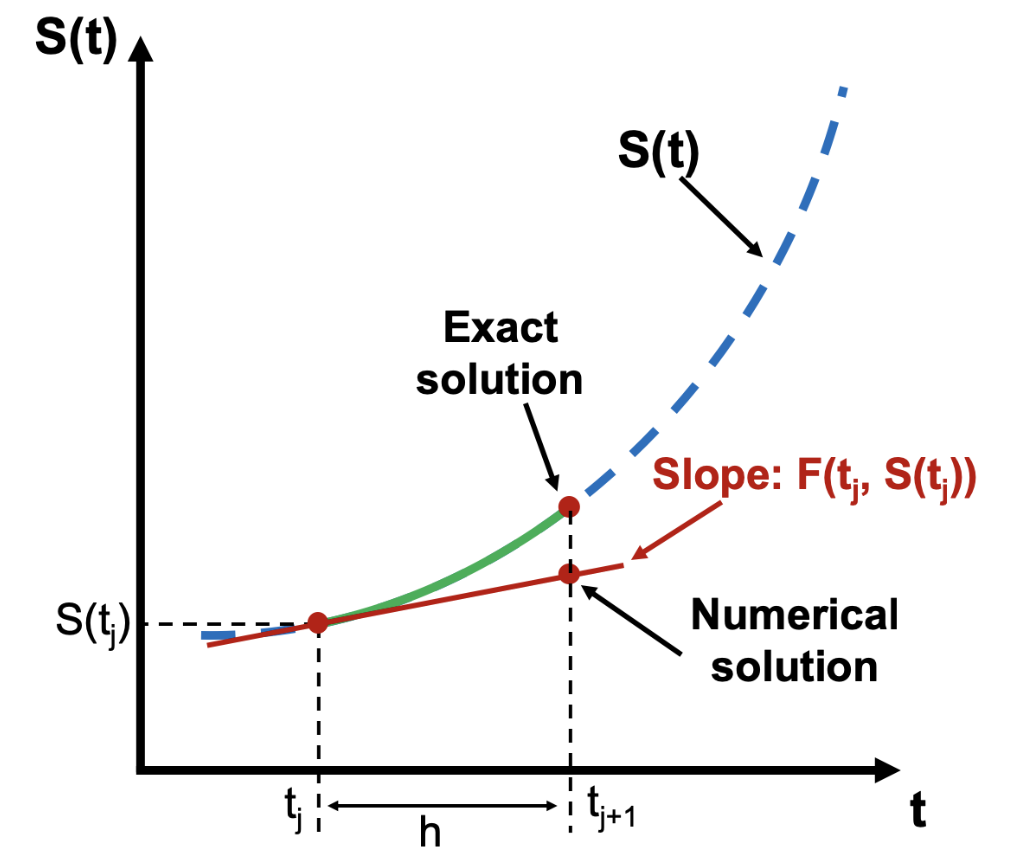





Given the system

\begin{equation*}
x'(t) = x^2(t), ~ t \in (0,0.9], ~x(0)= 1
\end{equation*}

We note that

\begin{equation*}
x(t) = - \frac{1}{t -1}
\end{equation*}

Is the exact solution, because differentiating one gets

\begin{equation*}
x'(t) = \frac{1}{(t-1)^2}
\end{equation*}

which is of course equal to $x^2(t)$

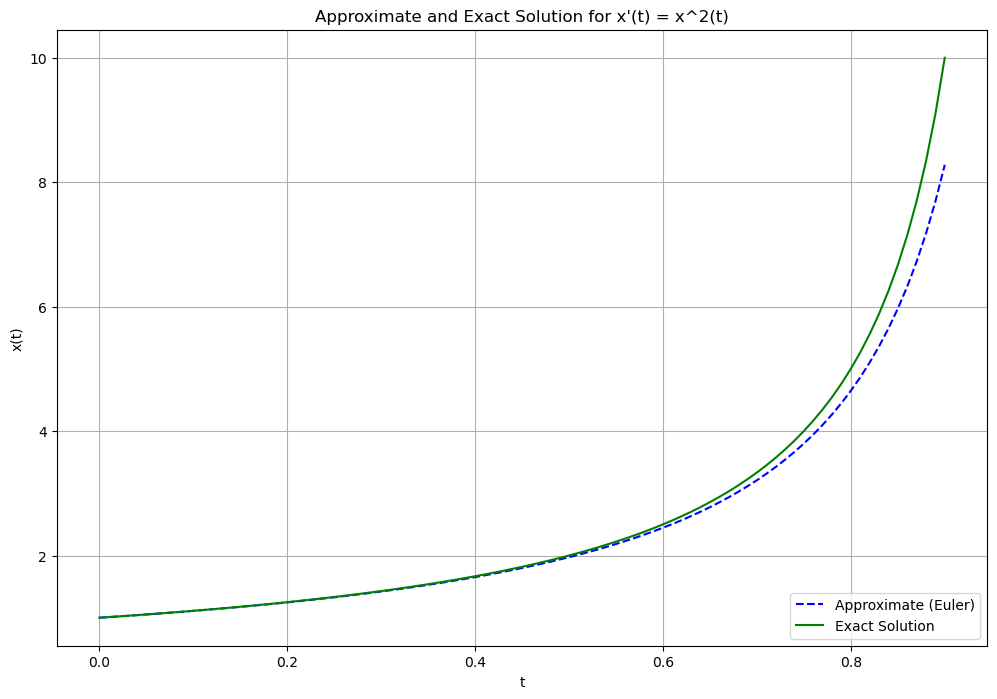

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, t0, t_end, x0, h):
    """
    Implements the explicit Euler method to solve ODEs.
    
    Parameters:
        f: function
            The derivative function f(t, x).
        t0: float
            The initial time.
        t_end: float
            The end time.
        x0: float
            The initial condition x(t0).
        h: float
            The step size.
    
    Returns:
        t: numpy array
            Array of time points.
        x: numpy array
            Array of solution values at each time point.
    """
    t = np.arange(t0, t_end + h, h)
    x = np.zeros(len(t))
    x[0] = x0
    
    for i in range(len(t) - 1):
        x[i + 1] = x[i] + h * f(t[i], x[i])
    
    return t, x

# Define the derivative function
def f(t, x):
    return x**2

# Parameters
t0 = 0
t_end = 0.9
x0 = 1
h = 0.01

# Solve using explicit Euler method
t, x_expl = explicit_euler(f, t0, t_end, x0, h)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x_expl, 'b--', label='Approximate (Euler)')
plt.plot(t, -1 / (t - 1), 'g', label='Exact Solution')
plt.title("Approximate and Exact Solution for x'(t) = x^2(t)")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Part 2

We now consider Newtons method and implement the Backward Euler method.

For a given ODE:

\begin{equation*}
\vec{x}'(t) = \vec{f}(\vec{x}(t))
\end{equation*}

The Backward Euler method is given by

\begin{equation*}
\vec{x}_{n+1} = \vec{x}_n + h \vec{f}(\vec{x}_{n+1})
\end{equation*}

We must solve for $\vec{x}_{n+1}$ at each step. This is done using Newtons method. We define the function

\begin{equation*}
\vec{F}(t,\vec{x}_{n+1}) = \vec{x}_{n+1} - \vec{x}_n - h \vec{f}(t_{n+1},\vec{x}_{n+1})
\end{equation*}


Newtons Method can be used to solve the equation and gives

\begin{equation*}
\vec{x}^{k+1} = \vec{x}^k - [D \vec{F}(\vec{x}^k)]^{-1} \vec{F}(\vec{x}^k)
\end{equation*}

Considering our $\vec{F}$ this gives

\begin{equation*}
D\vec{F}(\vec{x}) = I - hD\vec{f}(\vec{x})
\end{equation*}



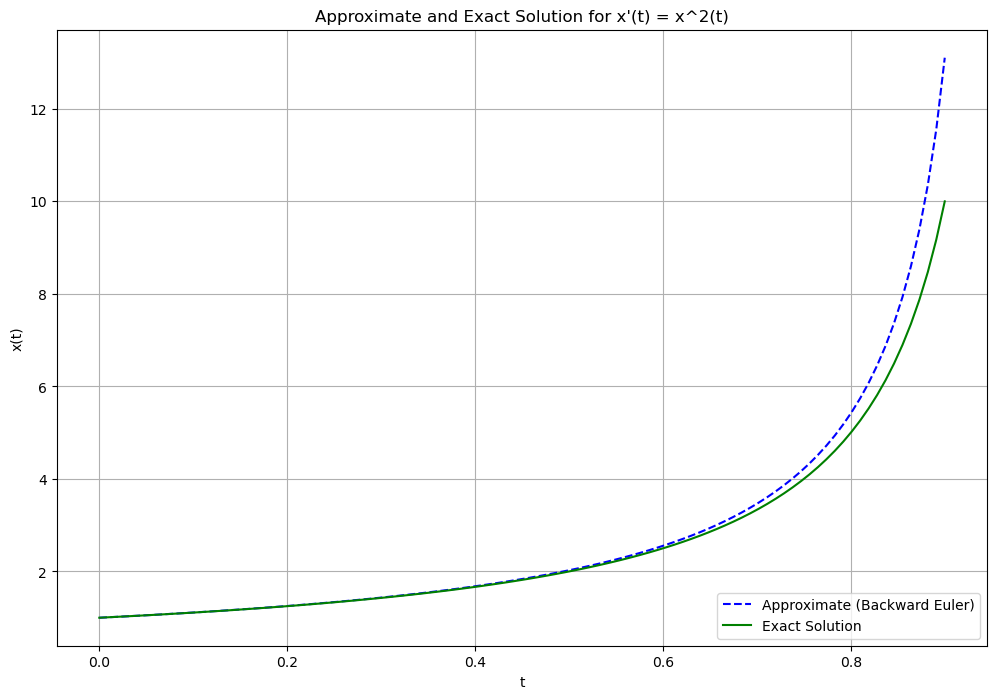

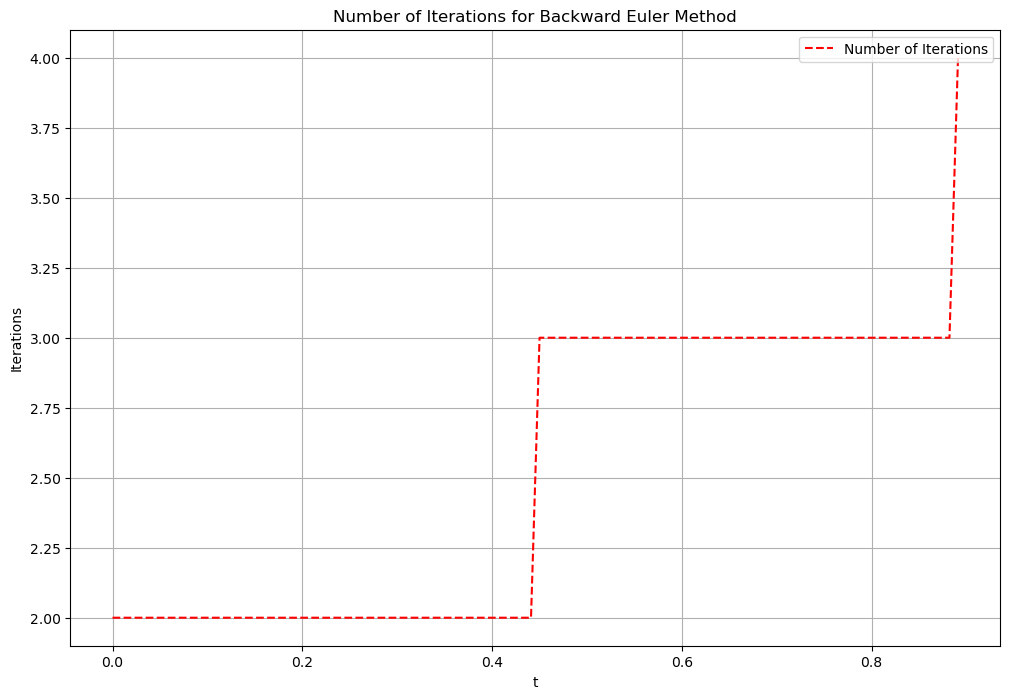

Number of iterations for each time step:
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 4.]
Total number of iterations:
251.0


In [7]:
def f(t,x):
    """
    ODE
    """
    return x**2

def df(t,x):
    """ 
    jacobian of the system
    """
    return 2*x

def backward_euler_newton(t0,tf,x0,n):
    """ 
    Solve x'=f(t,x) using the backward Euler method
    """

    h = (tf-t0)/n
    t = np.linspace(t0,tf,n+1)
    x = np.zeros(n+1)
    iterations = np.zeros(n)
    x[0] = x0

    for i in range(n):
        # Current Values
        tn, xn = t[i], x[i]

        # Forward Eueler
        x_guess = xn + h*f(tn,xn)

        # Newton Parameters
        tol = 1e-8
        max_iter = 100
        iter_count = 0
        error = float("inf")

        # Newton Iteration

        while error > tol and iter_count < max_iter:
            F = x_guess - xn - h*f(tn + h, x_guess)
            DF = 1- h*df(tn + h, x_guess)
            x_new = x_guess - F/DF
            error = abs(x_new - x_guess)
            x_guess = x_new
            iter_count += 1
        x[i+1] = x_guess
        iterations[i] = iter_count

    return t, x, iterations

# Parameters
t0,tf,x0,n = 0,0.9,1,100

# Solve using backward Euler method
t, x, iterations = backward_euler_newton(t0, tf, x0, n)


# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(t, x, 'b--', label='Approximate (Backward Euler)')
plt.plot(t, -1 / (t - 1), 'g', label='Exact Solution')

# Maybe Fix this sometimes
#plt.plot(t, x_expl, 'r--', label='Approximate (Explicit Euler)')
plt.title("Approximate and Exact Solution for x'(t) = x^2(t)")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()
# Plot the number of iterations
plt.figure(figsize=(12, 8))
plt.plot(t[:-1], iterations, 'r--', label='Number of Iterations')
plt.title("Number of Iterations for Backward Euler Method")
plt.xlabel('t')
plt.ylabel('Iterations')
plt.grid()
plt.legend(loc='upper right')
plt.show()


print("Number of iterations for each time step:")
print(iterations)
print("Total number of iterations:")
print(np.sum(iterations))